In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [3]:
# Load the dataset (Example: Mall Customer Segmentation Data)
url= "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
df = pd.read_csv(url)

In [5]:
print(df)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [9]:
# Display first few rows
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [11]:
# Drop non-numeric columns for clustering
df_numeric = df.select_dtypes(include=[np.number])

In [13]:
print(df_numeric)

     total_bill   tip  size
0         16.99  1.01     2
1         10.34  1.66     3
2         21.01  3.50     3
3         23.68  3.31     2
4         24.59  3.61     4
..          ...   ...   ...
239       29.03  5.92     3
240       27.18  2.00     2
241       22.67  2.00     2
242       17.82  1.75     2
243       18.78  3.00     2

[244 rows x 3 columns]


In [15]:
# Standardize the features for better clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [17]:
print(df_scaled)

[[-3.14711305e-01 -1.43994695e+00 -6.00192629e-01]
 [-1.06323531e+00 -9.69205340e-01  4.53382921e-01]
 [ 1.37779900e-01  3.63355539e-01  4.53382921e-01]
 [ 4.38315103e-01  2.25754144e-01 -6.00192629e-01]
 [ 5.40744704e-01  4.43019505e-01  1.50695847e+00]
 [ 6.19536705e-01  1.23965916e+00  1.50695847e+00]
 [-1.23995452e+00 -7.22971264e-01 -6.00192629e-01]
 [ 7.98507107e-01  8.81527488e-02  1.50695847e+00]
 [-5.34203307e-01 -7.51939979e-01 -6.00192629e-01]
 [-5.63468908e-01  1.67816714e-01 -6.00192629e-01]
 [-1.07111451e+00 -9.32994446e-01 -6.00192629e-01]
 [ 1.74175992e+00  1.44968234e+00  1.50695847e+00]
 [-4.91430507e-01 -1.03438495e+00 -6.00192629e-01]
 [-1.52624903e-01  1.24660453e-03  1.50695847e+00]
 [-5.57840908e-01  1.57309619e-02 -6.00192629e-01]
 [ 2.01939101e-01  6.67527044e-01 -6.00192629e-01]
 [-1.06436091e+00 -9.61963161e-01  4.53382921e-01]
 [-3.93503306e-01  5.15441291e-01  4.53382921e-01]
 [-3.16962505e-01  3.63355539e-01  4.53382921e-01]
 [ 9.72582994e-02  2.54722859e-

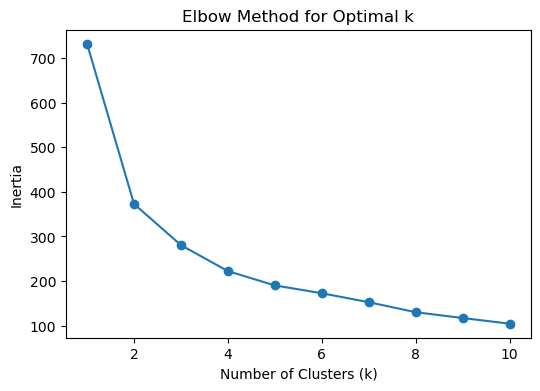

In [23]:
# Plot Elbow Method Graph
plt.figure(figsize=(6, 4))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


In [32]:
# Perform PCA for visualization (reducing dimensions to 2D)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]


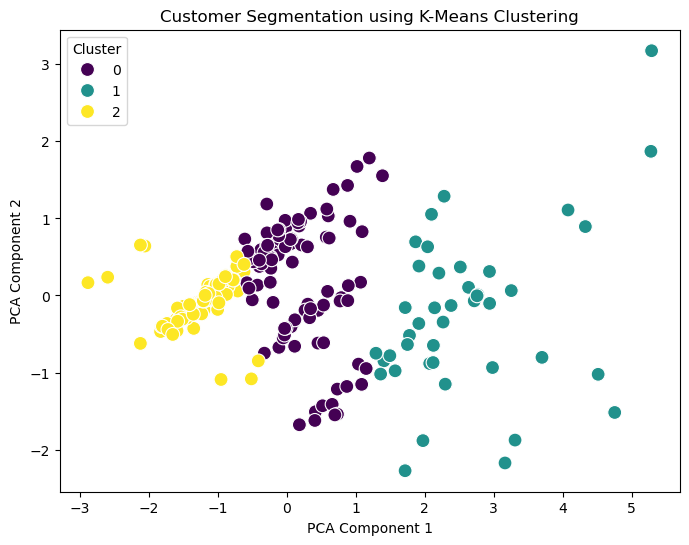

In [34]:
# Scatter plot of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette="viridis", s=100)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Segmentation using K-Means Clustering")
plt.legend(title="Cluster")
plt.show()


In [36]:
# Display cluster means
print("\nCluster Centers (Scaled Data):\n", pd.DataFrame(kmeans.cluster_centers_, columns=df_numeric.columns))



Cluster Centers (Scaled Data):
    total_bill       tip      size
0    0.155553  0.189978 -0.083941
1    1.543038  1.357776  1.632384
2   -0.787872 -0.745337 -0.589863
